In [ ]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import scipy.stats as sts
import matplotlib as mpl 

In [ ]:
#import csv files 
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

In [ ]:
#read data into dataframes
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

In [ ]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

In [ ]:
#get columns and rows that are not null 
city_data_df.count()

In [ ]:
#double check for null values
city_data_df.isnull().sum()

In [ ]:
#get data types
city_data_df.dtypes

In [ ]:
#get unique city types from dataframe
city_data_df["type"].unique()

In [ ]:
#same thing for ride data
ride_data_df.count()

In [ ]:
ride_data_df.isnull().sum()

In [ ]:
ride_data_df.dtypes

In [ ]:
#merge the two data frames. both DF's have city column in common. add cityDF to end of rideDF
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])

In [ ]:
#create dataframes for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [ ]:
#use groupby to create series that contain number of riders for each city type 
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [ ]:
#get average fare for each city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [ ]:
#get average number of drivers for each city 
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

In [ ]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color="coral", edgecolors="black", alpha=.8, linewidths=1, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()
plt.xlabel("Total Number of Rides Per City (2019)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

In [ ]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, color="skyblue", edgecolors="black", alpha=.8, linewidths=1, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()
plt.xlabel("Total Number of Rides Per City (2019)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

In [ ]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, color="gold", edgecolors="black", alpha=.8, linewidths=1, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()
plt.xlabel("Total Number of Rides Per City (2019)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

In [ ]:
#create one scatter chart with the 3 city type scatter charts
plt.subplots(figsize=(10,6))
#rural
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, color="gold", edgecolors="black", alpha=.8, linewidths=1, label="Rural")
#suburban
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, color="skyblue", edgecolors="black", alpha=.8, linewidths=1, label="Suburban")
#urban
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color="coral", edgecolors="black", alpha=.8, linewidths=1, label="Urban")
#add things to the scatter chart
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
plt.legend()

#fix legend size and add other parameters for font size
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")
# Save the figure.
plt.savefig("analysis/Fig1.png")
plt.show()

In [ ]:
#calc mean for each city ride type rounded to 2 decimal places
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2) 

In [ ]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

In [ ]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

In [ ]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

In [ ]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]

In [ ]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

In [ ]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]

In [ ]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.")

In [ ]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]

In [ ]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is {mode_rural_fares}.")

In [ ]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']


In [ ]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban cities is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban cities is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban cities is {mode_urban_drivers}.")

In [ ]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']

In [ ]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban cities is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban cities is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban cities is {mode_suburban_drivers}.")

In [ ]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']

In [ ]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural cities is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural cities is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural cities is {mode_rural_drivers}.")

In [ ]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [ ]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(5, 35, step=2.0))
ax.grid()
plt.show()

In [ ]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 20, step=1.0))
ax.grid()
plt.show()

In [ ]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [ ]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

In [ ]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

In [ ]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

In [ ]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 65, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

In [ ]:
# Add all fares box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 70, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

In [ ]:
#create box and whisker plot for urban driver count 
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_driver_count, labels=x_labels)
#add title y axis label and grid 
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,90, step=5))
ax.grid()
plt.show()
print("Summary Statistics")
urban_driver_count.describe()

In [ ]:
#create box and whisker plot for suburban driver count 
x_labels = ["suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_driver_count, labels=x_labels)
#add title y axis label and grid 
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,35, step=5))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_driver_count.describe()

In [ ]:
#create box and whisker plot for rural driver count 
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_driver_count, labels=x_labels)
#add title y axis label and grid 
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,15, step=1))
ax.grid()
plt.show()
print("Summary Statistics")
rural_driver_count.describe()

In [ ]:
# Add all driver count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
driver_data = [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [ ]:
#divide fares by type by total fares to get percentage
type_percents = (pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df["fare"].sum())*100

In [ ]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"],colors=["gold", "lightskyblue", "lightcoral"],explode=[0, 0, 0.1],autopct='%1.1f%%',shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
#save figure 
plt.savefig("analysis/fig5.png")
# Show Figure
plt.show()

In [ ]:
#calc percentage of rides for each city type
ride_percents = (pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df["ride_id"].count())*100

In [ ]:
# Build the percentage of rides by city type pie chart.
plt.pie(ride_percents, labels=["Rural", "Suburban", "Urban"],colors=["gold", "lightskyblue", "lightcoral"],explode=[0, 0, 0.1],autopct='%1.1f%%',shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
#save figure 
plt.savefig("analysis/fig6.png")
# Show Figure
plt.show()

In [204]:
#calc percentage of drivers for each city type
driver_percents = (city_data_df.groupby(["type"]).sum()["driver_count"]/city_data_df["driver_count"].sum())*100

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

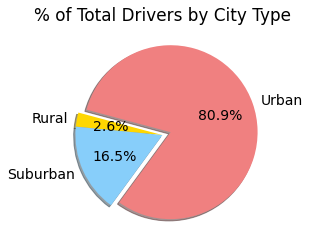

In [206]:
# Build the percentage of rides by city type pie chart.
plt.pie(driver_percents, labels=["Rural", "Suburban", "Urban"],colors=["gold", "lightskyblue", "lightcoral"],explode=[0, 0, 0.1],autopct='%1.1f%%',shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
#save figure 
plt.savefig("analysis/fig7.png")
# Show Figure
plt.show()